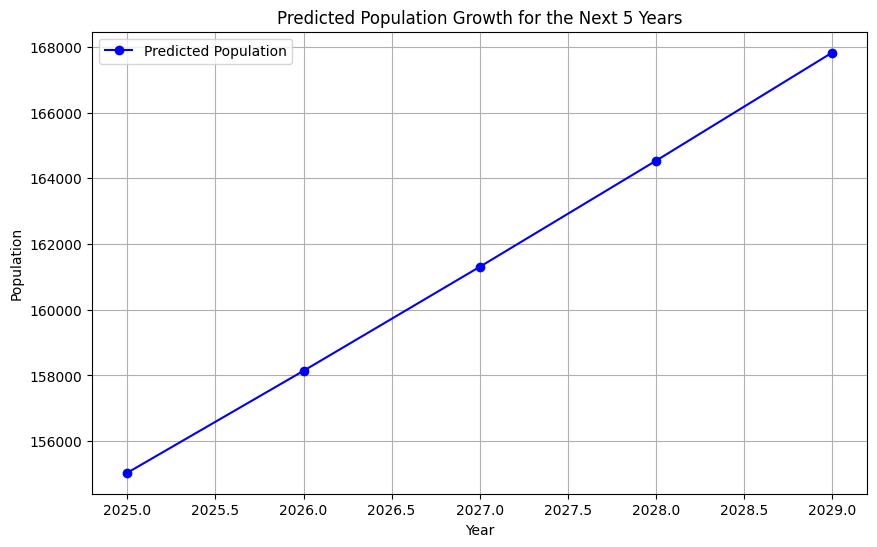

(  Age Group    Population
 0      1-10  18463.401282
 1     11-20  22898.141886
 2     21-30  22737.590571
 3     31-40  22703.326571
 4     41-50  21314.166103
 5     51-60  20648.465527
 6     61-65  23234.908060,
    Year Predicted Population
 0  2025           [155040.0]
 1  2026           [158140.8]
 2  2027         [161303.616]
 3  2028       [164529.68832]
 4  2029     [167820.2820864])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate the fake dataset
np.random.seed(42)  # For reproducibility

# Define the total population
total_population = 152000
age_groups = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 65)]

# Simulate a population distribution across these age groups
age_group_population = np.random.randint(18000, 25000, size=len(age_groups))  # Random distribution per group

# Normalize the distribution to sum up to total population
age_group_population = age_group_population * (total_population / sum(age_group_population))

# Create DataFrame for visualization
age_groups_labels = [f"{age[0]}-{age[1]}" for age in age_groups]
df = pd.DataFrame({
    'Age Group': age_groups_labels,
    'Population': age_group_population
})

# Step 2: Predict future population growth (linear model)
# For simplicity, we assume a constant annual growth rate

# Let's say the population is growing by 2% annually
growth_rate = 0.02  # 2% growth per year
years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)

# Calculate the future population using the growth rate
current_population = total_population
future_populations = []

for year in years:
    future_population = current_population * (1 + growth_rate) ** (year - 2024)
    future_populations.append(future_population)

# Create future population dataframe for visualization
future_df = pd.DataFrame({
    'Year': years.flatten(),
    'Predicted Population': future_populations
})

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(future_df['Year'], future_df['Predicted Population'], marker='o', color='blue', label='Predicted Population')
plt.title('Predicted Population Growth for the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()

# Return the fake dataset and future predictions
df, future_df


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data
# For simplicity, we'll use the years and corresponding population as features and labels

# Historical population data (Year, Population) - Example of 2020, 2021, etc.
years_historical = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)
populations_historical = np.array([152000, 155000, 158000, 161000])  # Example populations for each year

# Normalize the data (scaling year and population)
scaler = StandardScaler()
years_scaled = scaler.fit_transform(years_historical)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(years_scaled, populations_historical, test_size=0.2, random_state=42)

# Step 2: Create the Neural Network model
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),  # 1 input feature: year
    Dense(32, activation='relu'),
    Dense(1)  # Output: predicted population
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Step 4: Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Step 5: Make predictions
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")


ModuleNotFoundError: No module named 'tensorflow'